<a href="https://colab.research.google.com/github/dyou-wbg/meta_processing/blob/main/Stats_All_metadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
# as of today
import datetime as dt
dt.date.today()
import os
import pandas as pd
from google.colab import drive
import csv
import os


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
directory = '/content/drive/MyDrive/finalMetaFile'

final_file_list = ['metadata_jstor.csv', 'scopus_fixed_encoding.csv',
                   'elsevier_metadata.csv', 'metadata_semantic_scholar.csv',
                   'url1_ie_table_complete.csv', 'metadata_econlit.csv',
                   'SSRN_metadata.csv', 'metadata_repec.csv']


# matching feature name
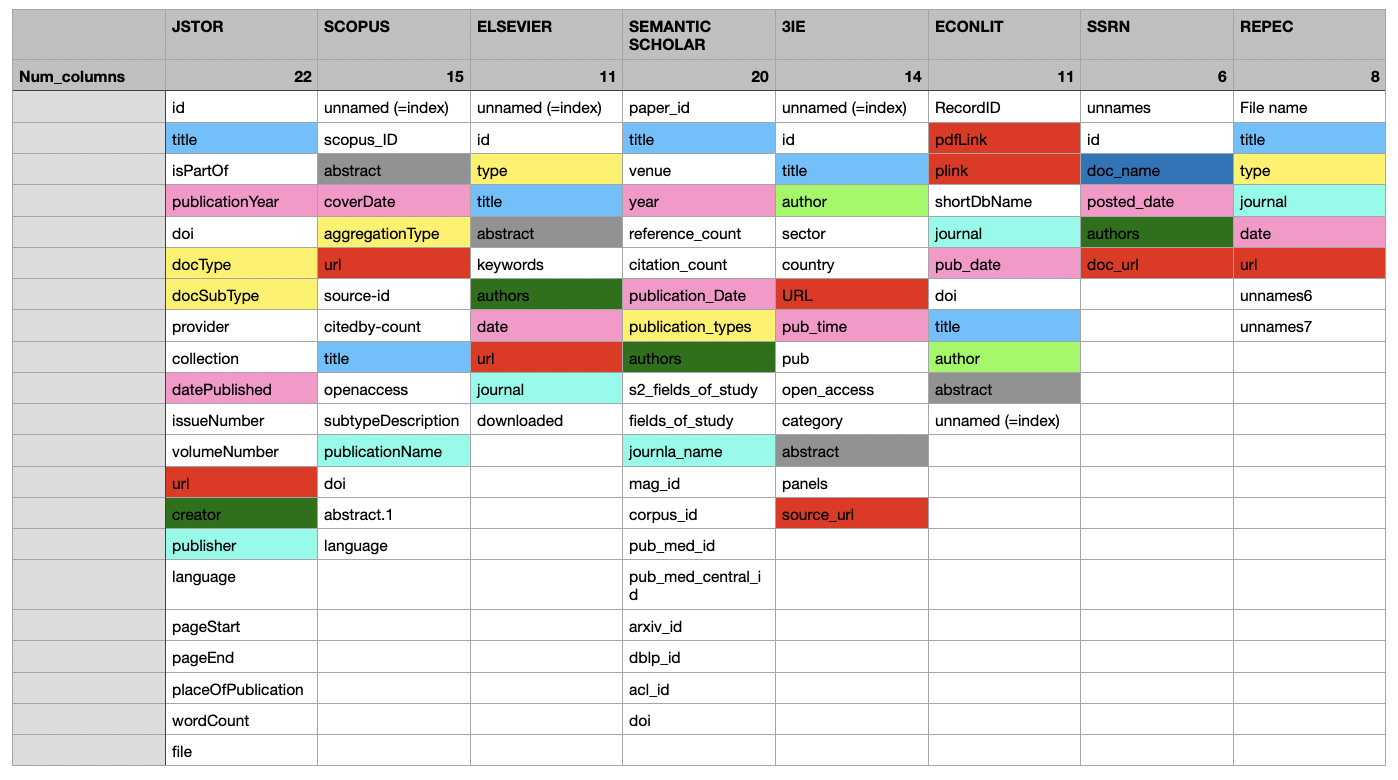

In [ ]:

def get_column_names(file_list, directory):
  column_names = {}
  for filename in file_list:
    filepath = os.path.join(directory, filename)
    df = pd.read_csv(filepath,nrows=15)
    column_names[filename] = list(df.columns)
  return column_names

column_names = get_column_names(final_file_list, directory)

for filename, columns in column_names.items():
  print(f"Columns in {filename}:")
  print(*columns, sep=", ")
  print()


Columns in metadata_jstor.csv:
id, title, isPartOf, publicationYear, doi, docType, docSubType, provider, collection, datePublished, issueNumber, volumeNumber, url, creator, publisher, language, pageStart, pageEnd, placeOfPublication, wordCount, pageCount, file

Columns in scopus_fixed_encoding.csv:
Unnamed: 0, scopus_ID, abstract, coverDate, aggregationType, url, source-id, citedby-count, title, openaccess, subtypeDescription, publicationName, doi, abstract.1, language

Columns in elsevier_metadata.csv:
Unnamed: 0, id, type, title, abstract, keywords, authors, date, url, journal, downloaded

Columns in metadata_semantic_scholar.csv:
paper_id, title, venue, year, reference_count, citation_count, publication_date, publication_types, authors, s2_fields_of_study, fields_of_study, journal_name, mag_id, corpus_id, pub_med_id, pub_med_central_id, arxiv_id, dblp_id, acl_id, doi

Columns in url1_ie_table_complete.csv:
Unnamed: 0, id, title, author, sector, country, URL, pub_time, pub, open_acce

In [ ]:




def get_column_names(file_list, directory):
  column_names = {}
  for filename in file_list:
    filepath = os.path.join(directory, filename)
    df = pd.read_csv(filepath,nrows=5)
    column_names[filename] = list(df.columns)
  return column_names

column_names = get_column_names(final_file_list, directory)

for filename, columns in column_names.items():
  print(f"Number of columns in {filename}: {len(columns)}")

Number of columns in metadata_jstor.csv: 22
Number of columns in scopus_fixed_encoding.csv: 15
Number of columns in elsevier_metadata.csv: 11
Number of columns in metadata_semantic_scholar.csv: 20
Number of columns in url1_ie_table_complete.csv: 14
Number of columns in metadata_econlit.csv: 11
Number of columns in SSRN_metadata.csv: 6
Number of columns in metadata_repec.csv: 8


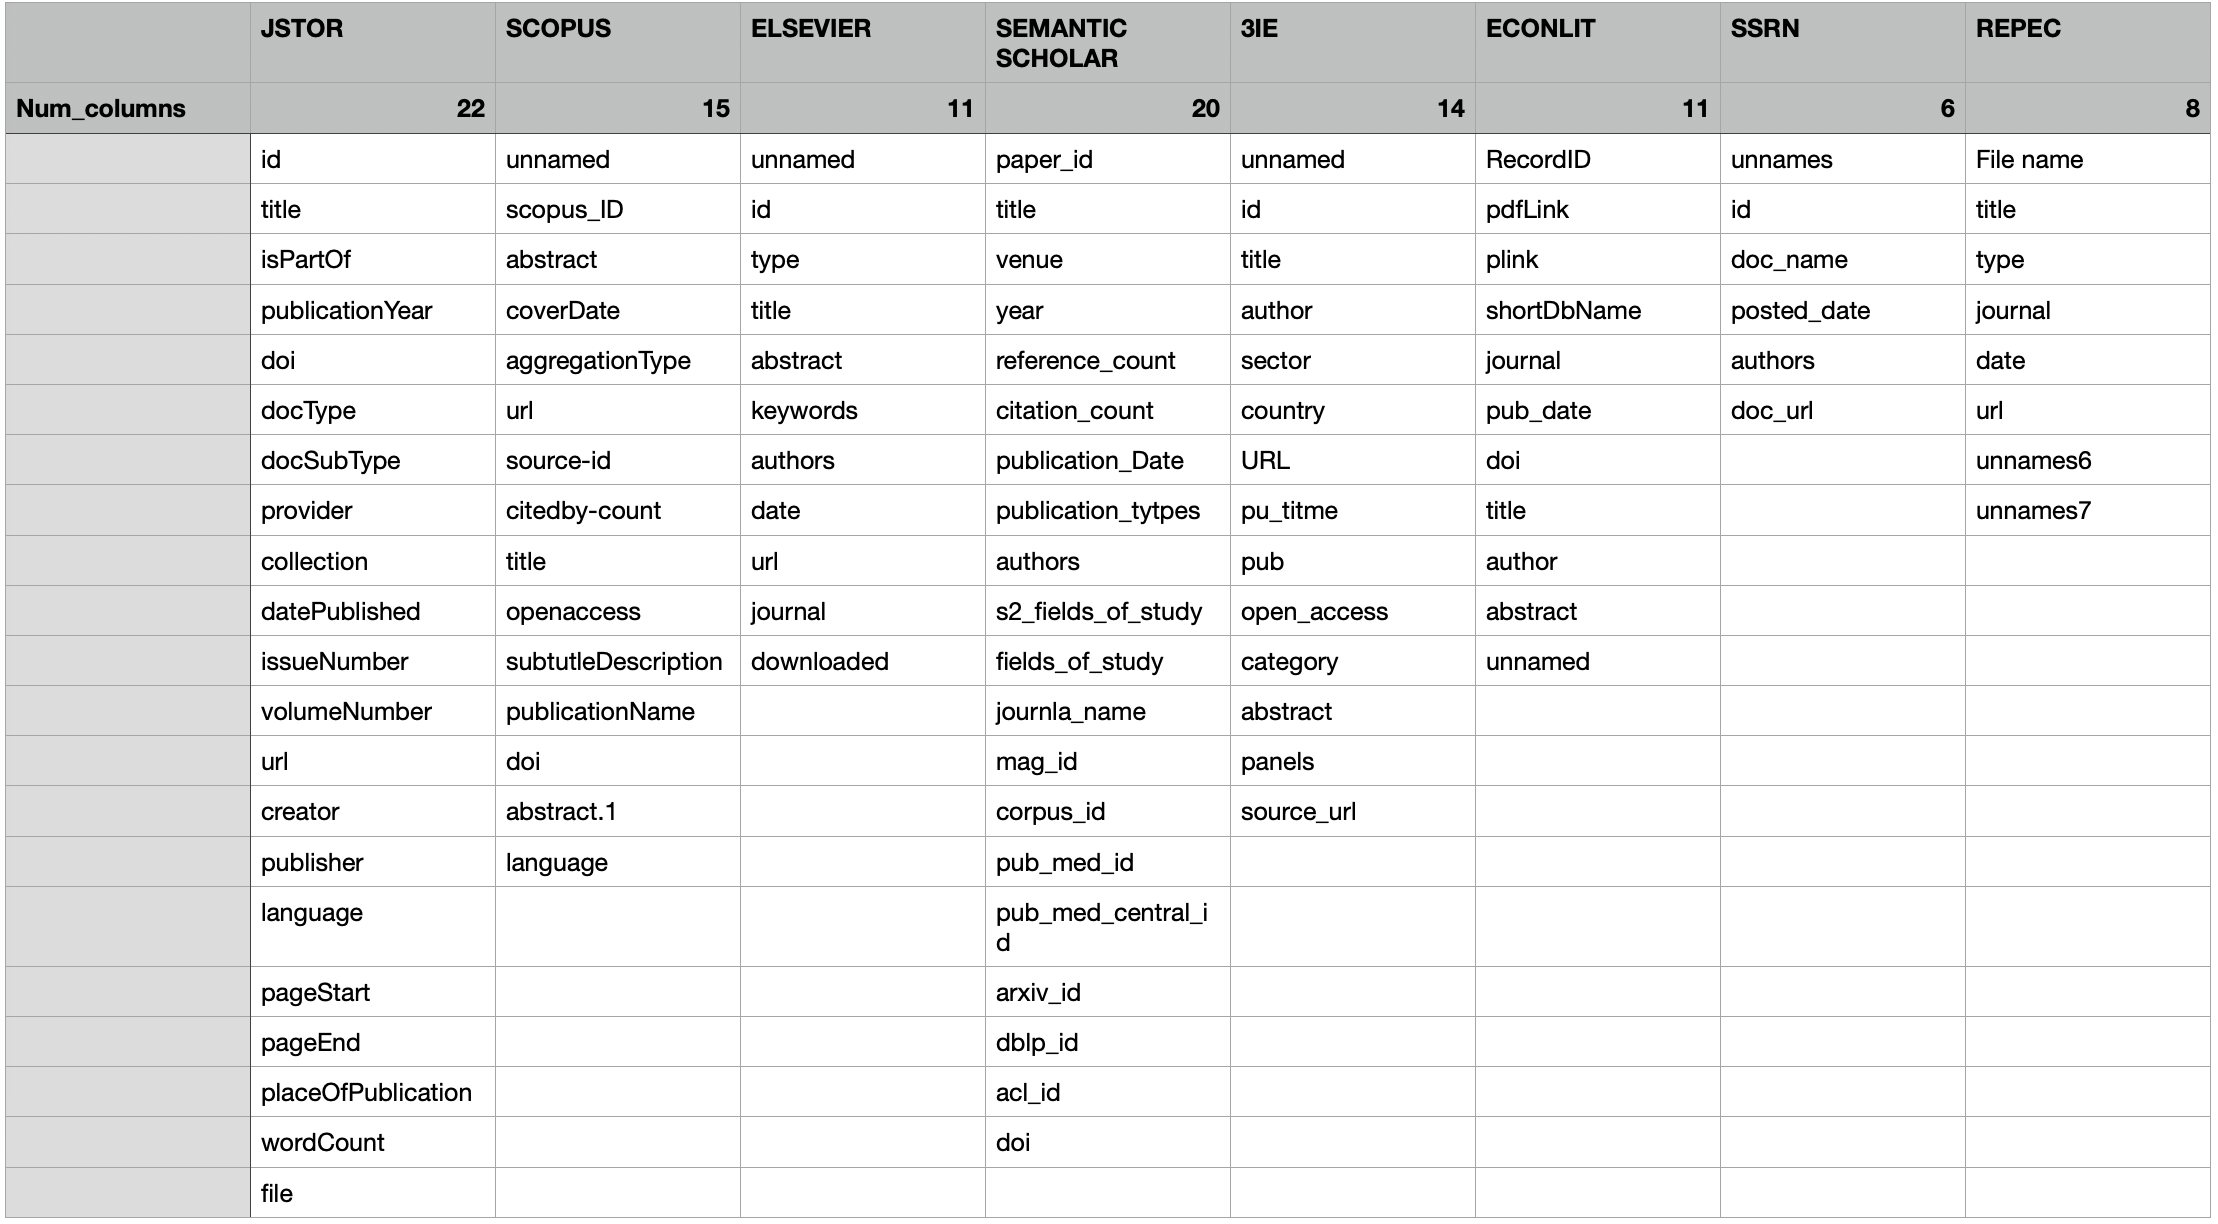

In [ ]:
for filename in final_file_list:
  filepath = os.path.join(directory, filename)
  df = pd.read_csv(filepath, nrows=5)
  print(f"First five rows of {filename}:")
  print(df.head())
  print("----------------------------------------------------------------------------")


First five rows of metadata_jstor.csv:
                                                  id  \
0                http://www.jstor.org/stable/1182553   
1                http://www.jstor.org/stable/1030535   
2  http://www.jstor.org/stable/10.5325/transporta...   
3         http://www.jstor.org/stable/10.1086/587909   
4                http://www.jstor.org/stable/1094350   

                                               title  \
0  Economic Education in Our Schools: A Renewed M...   
1                 Can Germany Contain Russia Safely?   
2  Assessing the Impact of Sarbanes-Oxley Act on ...   
3  Childhood Educational Disruption and Later Lif...   
4          The Exclusion of Liability for Negligence   

                                            isPartOf  publicationYear  doi  \
0                  The Journal of Economic Education             1984  NaN   
1  The Annals of the American Academy of Politica...             1952  NaN   
2                             Transportation Journal 

# Similar features 🇰


https://docs.google.com/spreadsheets/d/1Nm2Q6IkshmLX1L70Hbev4sN04_xyZCzq/edit#gid=1027577311

In [ ]:

for filename in final_file_list:
  filepath = os.path.join(directory, filename)
  df = pd.read_csv(filepath,nrows=100)
  print(f"Object types in {filename}:")
  for column in df.columns:
    print(f"{column}: {df[column].dtypes}")
  print("----------------------------------------------------------------------------")


Object types in metadata_jstor.csv:
id: object
title: object
isPartOf: object
publicationYear: int64
doi: float64
docType: object
docSubType: object
provider: object
collection: float64
datePublished: object
issueNumber: float64
volumeNumber: float64
url: object
creator: object
publisher: object
language: object
pageStart: object
pageEnd: object
placeOfPublication: float64
wordCount: int64
pageCount: int64
file: object
----------------------------------------------------------------------------
Object types in scopus_fixed_encoding.csv:
Unnamed: 0: int64
scopus_ID: object
abstract: object
coverDate: object
aggregationType: object
url: object
source-id: int64
citedby-count: int64
title: object
openaccess: float64
subtypeDescription: object
publicationName: object
doi: object
abstract.1: float64
language: object
----------------------------------------------------------------------------
Object types in elsevier_metadata.csv:
Unnamed: 0: int64
id: int64
type: object
title: object
abstrac

In [ ]:

column_names = get_column_names(final_file_list, directory)

column_availability = {}
for filename, columns in column_names.items():
  column_availability[filename] = {}
  for column in columns:
    column_availability[filename][column] = 0

for filename in final_file_list:
  filepath = os.path.join(directory, filename)
  df = pd.read_csv(filepath)
  for column in df.columns:
    column_availability[filename][column] += 1

sorted_column_availability = {}
for filename, columns in column_availability.items():
  sorted_column_availability[filename] = sorted(columns.items(), key=lambda x: x[1], reverse=True)

for filename, columns in sorted_column_availability.items():
  print(f"Columns in {filename} sorted by availability:")
  for column, availability in columns:
    print(f"{column}: {availability}")
  print("----------------------------------------------------------------------------")


<ipython-input-28-a3192e23862b>:11: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
<ipython-input-28-a3192e23862b>:11: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
<ipython-input-28-a3192e23862b>:11: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Columns in metadata_jstor.csv sorted by availability:
id: 1
title: 1
isPartOf: 1
publicationYear: 1
doi: 1
docType: 1
docSubType: 1
provider: 1
collection: 1
datePublished: 1
issueNumber: 1
volumeNumber: 1
url: 1
creator: 1
publisher: 1
language: 1
pageStart: 1
pageEnd: 1
placeOfPublication: 1
wordCount: 1
pageCount: 1
file: 1
----------------------------------------------------------------------------
Columns in scopus_fixed_encoding.csv sorted by availability:
Unnamed: 0: 1
scopus_ID: 1
abstract: 1
coverDate: 1
aggregationType: 1
url: 1
source-id: 1
citedby-count: 1
title: 1
openaccess: 1
subtypeDescription: 1
publicationName: 1
doi: 1
abstract.1: 1
language: 1
----------------------------------------------------------------------------
Columns in elsevier_metadata.csv sorted by availability:
Unnamed: 0: 1
id: 1
type: 1
title: 1
abstract: 1
keywords: 1
authors: 1
date: 1
url: 1
journal: 1
downloaded: 1
----------------------------------------------------------------------------
Colum

In [ ]:

def calculate_completeness(file_list, directory):
  completeness = {}
  for filename in file_list:
    filepath = os.path.join(directory, filename)
    df = pd.read_csv(filepath)
    #df.drop(columns=[col for col in df.columns if any(word in col for word in ['url', 'author', 'unnamed', 'doi', 'link','id','title','isPartOf'])], inplace=True)
    completeness[filename] = {}
    for column in df.columns:
      completeness[filename][column] = df[column].count() / len(df)
  return completeness

completeness = calculate_completeness(final_file_list, directory)

for filename, columns in completeness.items():
  print(f"Completeness of data in {filename}:")
  for column, completeness_score in columns.items():
    print(f"{column}: {completeness_score}")
  print("----------------------------------------------------------------------------")


<ipython-input-29-55decb4f539b>:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
<ipython-input-29-55decb4f539b>:5: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
<ipython-input-29-55decb4f539b>:5: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Completeness of data in metadata_jstor.csv:
id: 1.0
title: 1.0
isPartOf: 1.0
publicationYear: 1.0
doi: 0.0
docType: 1.0
docSubType: 1.0
provider: 1.0
collection: 0.0
datePublished: 1.0
issueNumber: 0.9725487904852848
volumeNumber: 0.9259118603466503
url: 1.0
creator: 0.8511445155094313
publisher: 1.0
language: 0.9999616577718784
pageStart: 0.9983795844067636
pageEnd: 0.9983622391130895
placeOfPublication: 0.0
wordCount: 1.0
pageCount: 0.999992696718453
file: 1.0
----------------------------------------------------------------------------
Completeness of data in scopus_fixed_encoding.csv:
Unnamed: 0: 1.0
scopus_ID: 1.0
abstract: 0.8517946104483666
coverDate: 1.0
aggregationType: 0.9999708785322781
url: 1.0
source-id: 1.0
citedby-count: 1.0
title: 0.9999687984274408
openaccess: 0.8805458195093032
subtypeDescription: 0.999967758375022
publicationName: 1.0
doi: 0.8913706850825281
abstract.1: 0.0
language: 0.9985137650937608
------------------------------------------------------------------

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns
for filename in final_file_list:
  filepath = os.path.join(directory, filename)
  df = pd.read_csv(filepath,nrows=200)
  df.drop(columns=[col for col in df.columns if any(word in col for word in ['url', 'author', 'unnamed', 'doi', 'link','id','title','isPartOf'])], inplace=True)
  categorical_columns = df.select_dtypes(include=['object']).columns
  for column in categorical_columns:
    plt.figure()
    sns.barplot(x=column, y=df[column].value_counts().values, palette='Set2')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Proportion of {column} in {filename}')
    plt.show()


ValueError: Could not interpret value `docType` for `x`. Value is a string, but `data` was not passed.

<Figure size 640x480 with 0 Axes>

<ipython-input-5-7ffe240d4a03>:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


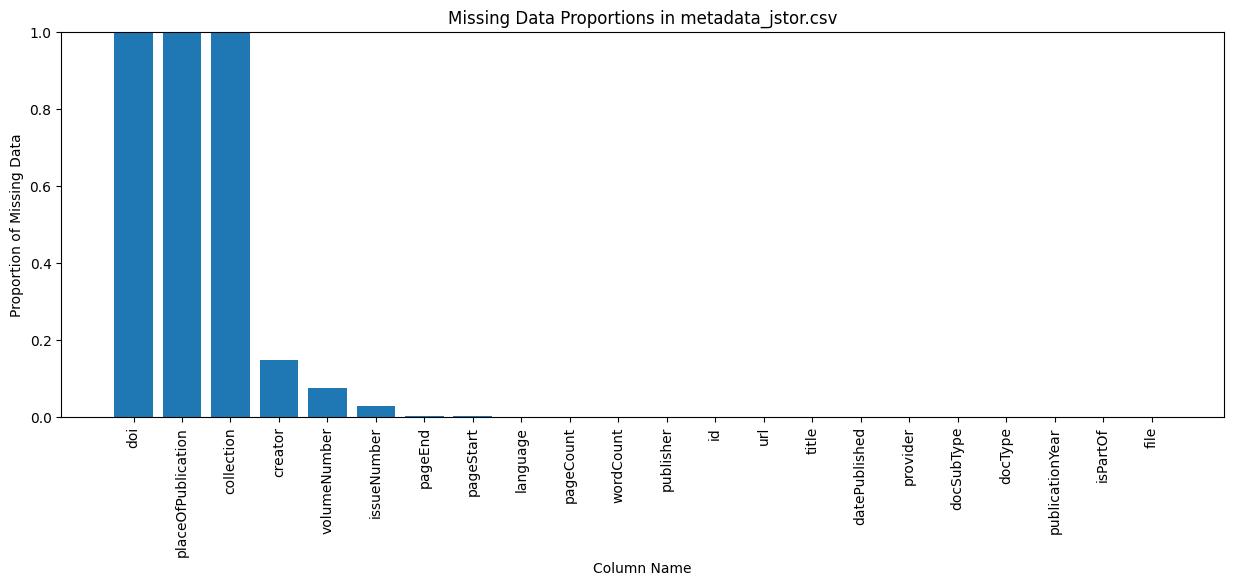

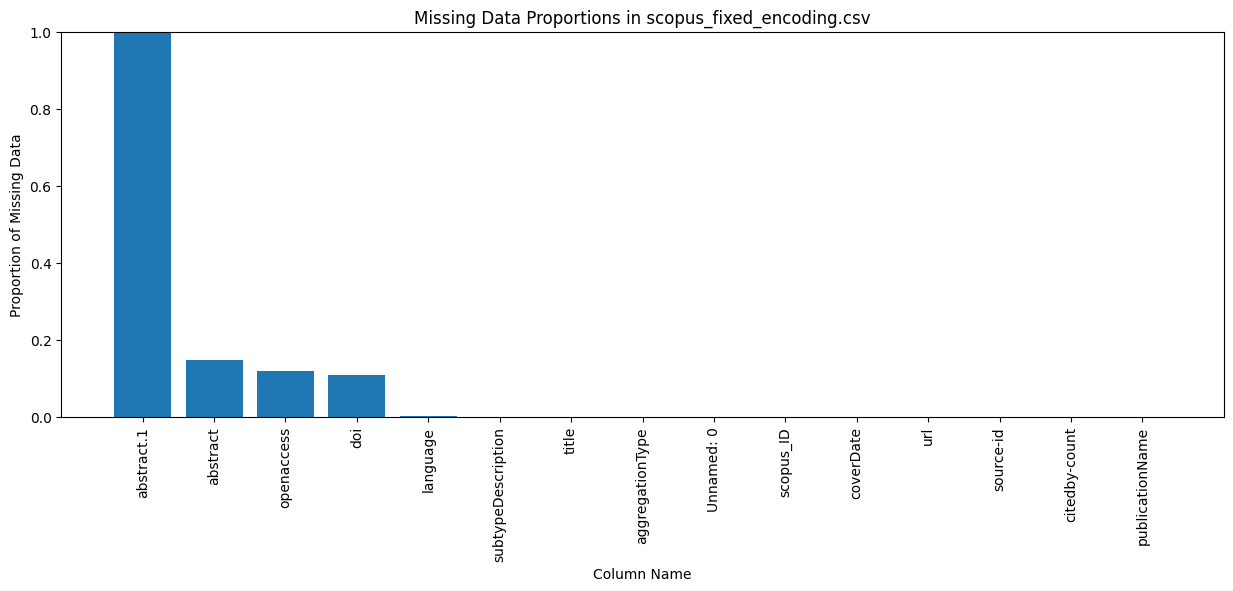

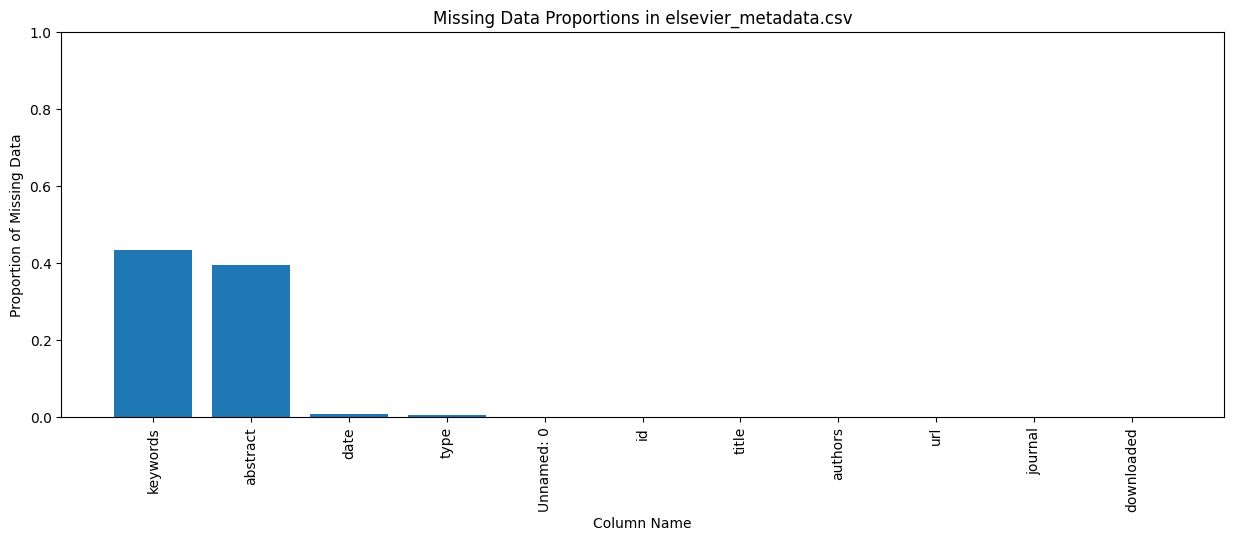

<ipython-input-5-7ffe240d4a03>:6: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


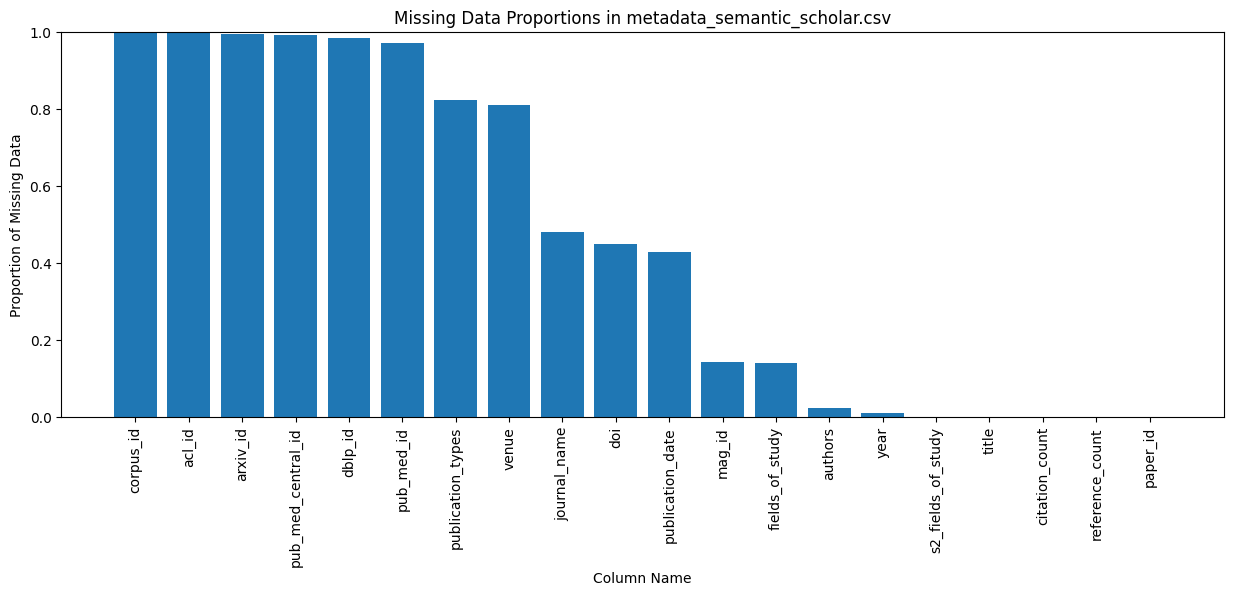

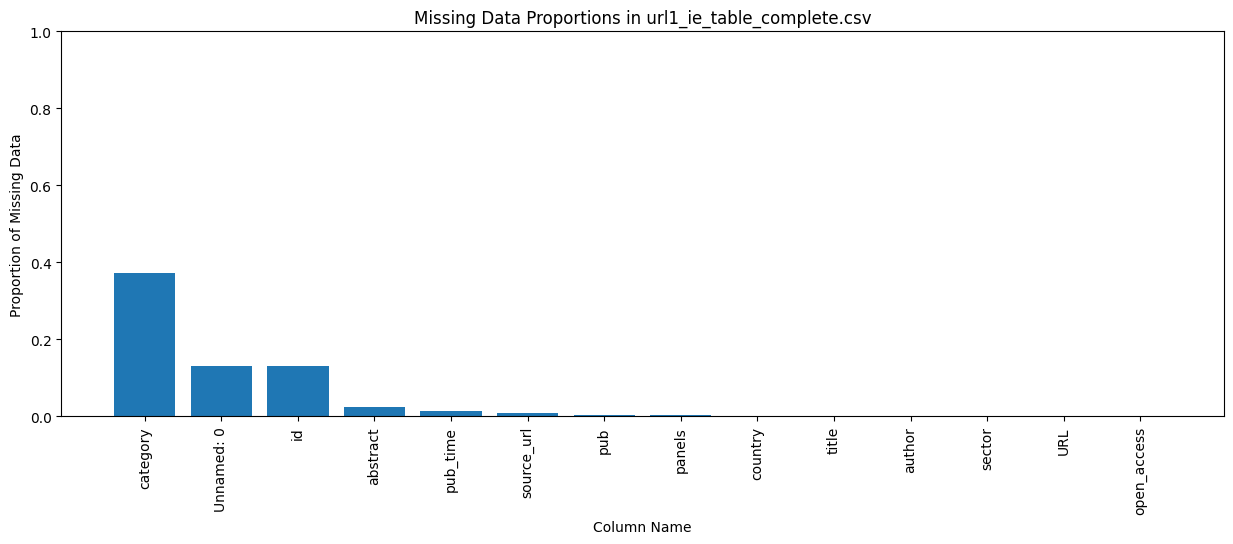

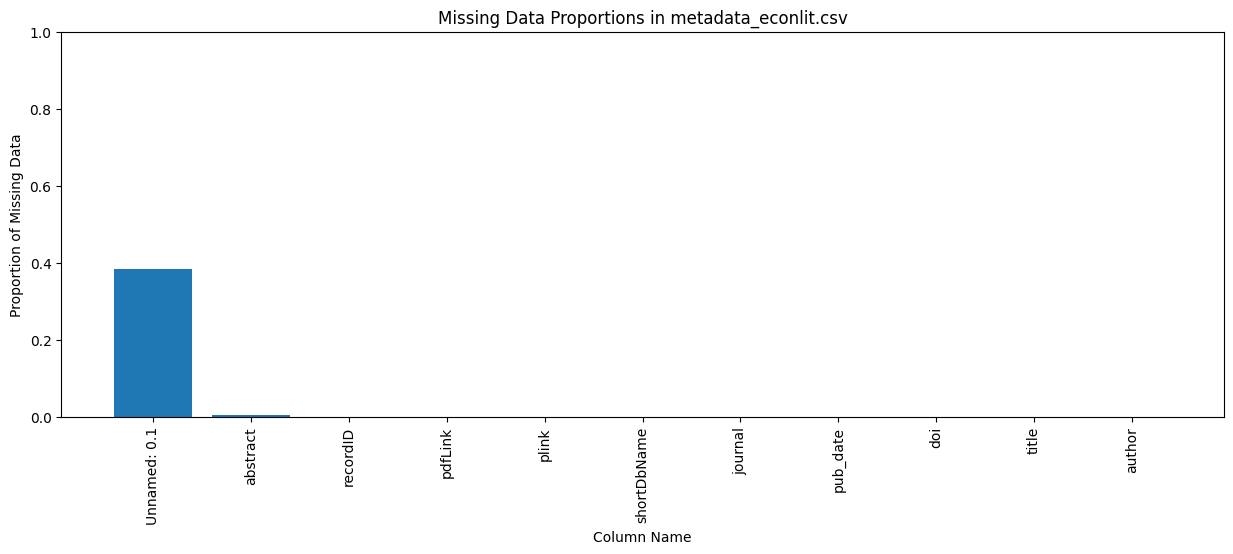

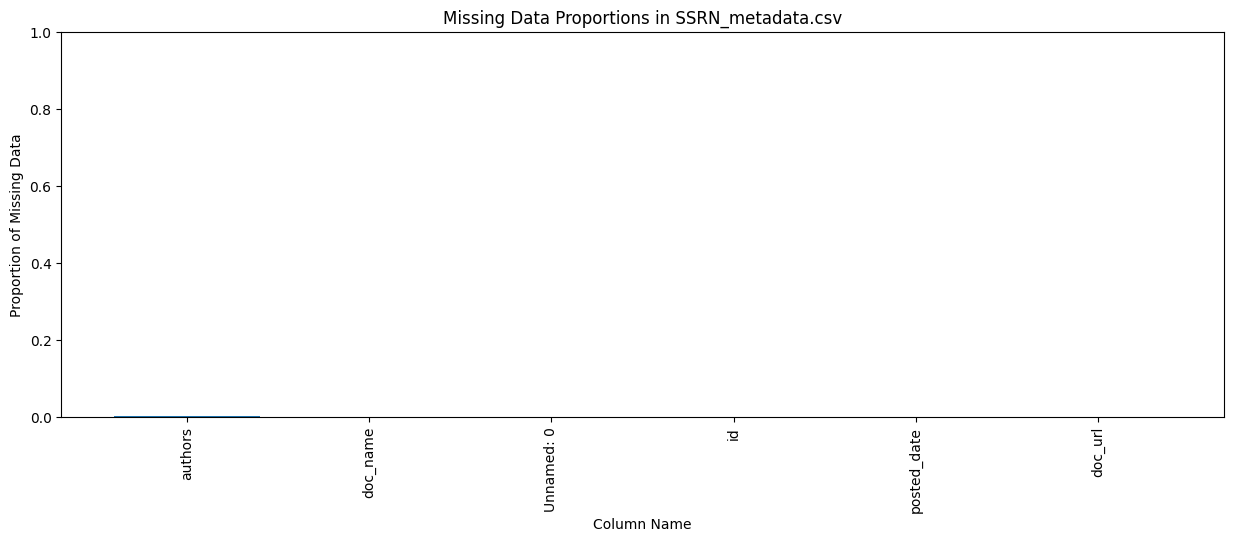

<ipython-input-5-7ffe240d4a03>:6: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


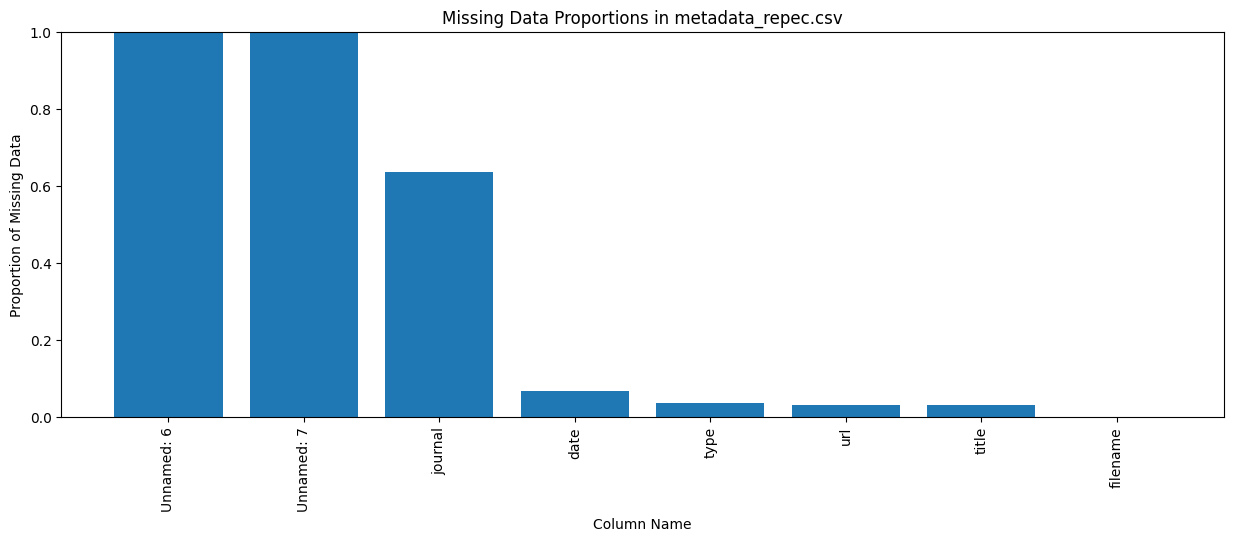

In [ ]:

import matplotlib.pyplot as plt

def plot_missing_data_proportions(file_list, directory):
  for filename in file_list:
    filepath = os.path.join(directory, filename)
    df = pd.read_csv(filepath)
    missing_data_proportions = df.isna().mean().sort_values(ascending=False)

    plt.figure(figsize=(15, 5))
    plt.bar(missing_data_proportions.index, missing_data_proportions.values)
    plt.xlabel("Column Name")
    plt.xticks(rotation=90)
    plt.ylabel("Proportion of Missing Data")
    plt.ylim(0,1)
    plt.title(f"Missing Data Proportions in {filename}")
    plt.show()

plot_missing_data_proportions(final_file_list, directory)


In [ ]:
final_df = pd.DataFrame()

for filename in final_file_list:
  filepath = os.path.join(directory, filename)
  df = pd.read_csv(filepath)
  final_df = final_df.append(df, ignore_index=True)

final_df.to_csv(os.path.join(directory, 'combined_metadata.csv'), index=False)


<ipython-input-3-e8fbef95a4ce>:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
<ipython-input-3-e8fbef95a4ce>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(df, ignore_index=True)
<ipython-input-3-e8fbef95a4ce>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(df, ignore_index=True)
<ipython-input-3-e8fbef95a4ce>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(df, ignore_index=True)
<ipython-input-3-e8fbef95a4ce>:5: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
<ipython-input-

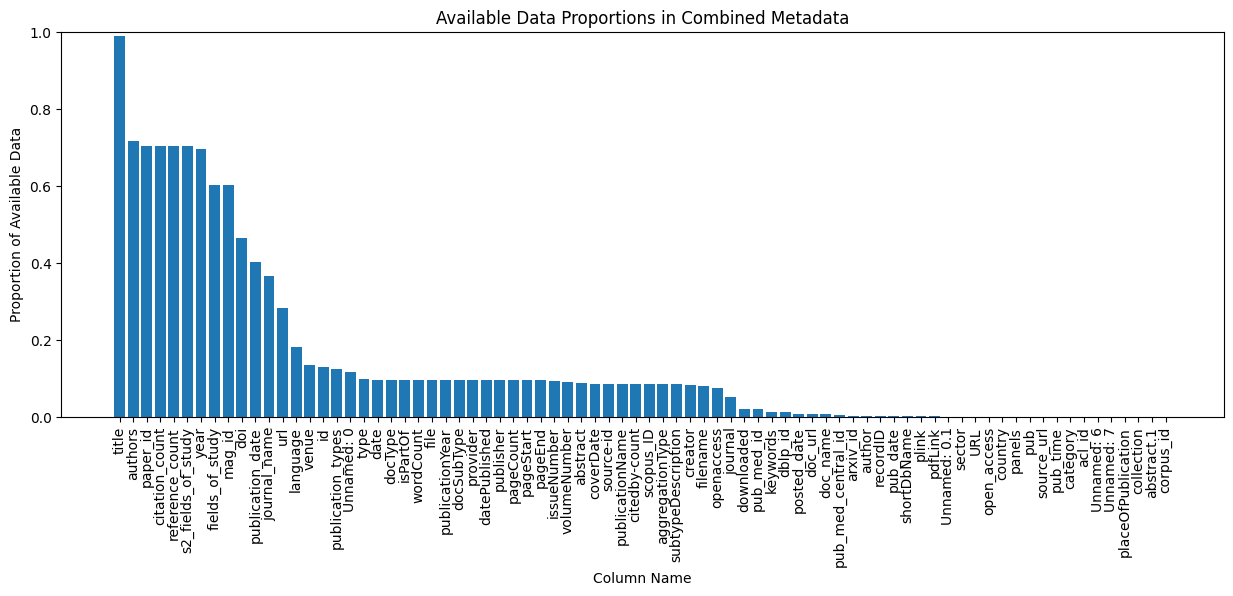

In [ ]:
import matplotlib.pyplot as plt

available_data_proportions = (1 - final_df.isna().mean()).sort_values(ascending=False)

plt.figure(figsize=(15, 5))
plt.bar(available_data_proportions.index, available_data_proportions.values)
plt.xlabel("Column Name")
plt.xticks(rotation=90)
plt.ylabel("Proportion of Available Data")
plt.ylim(0,1)
plt.title("Available Data Proportions in Combined Metadata")
plt.show()


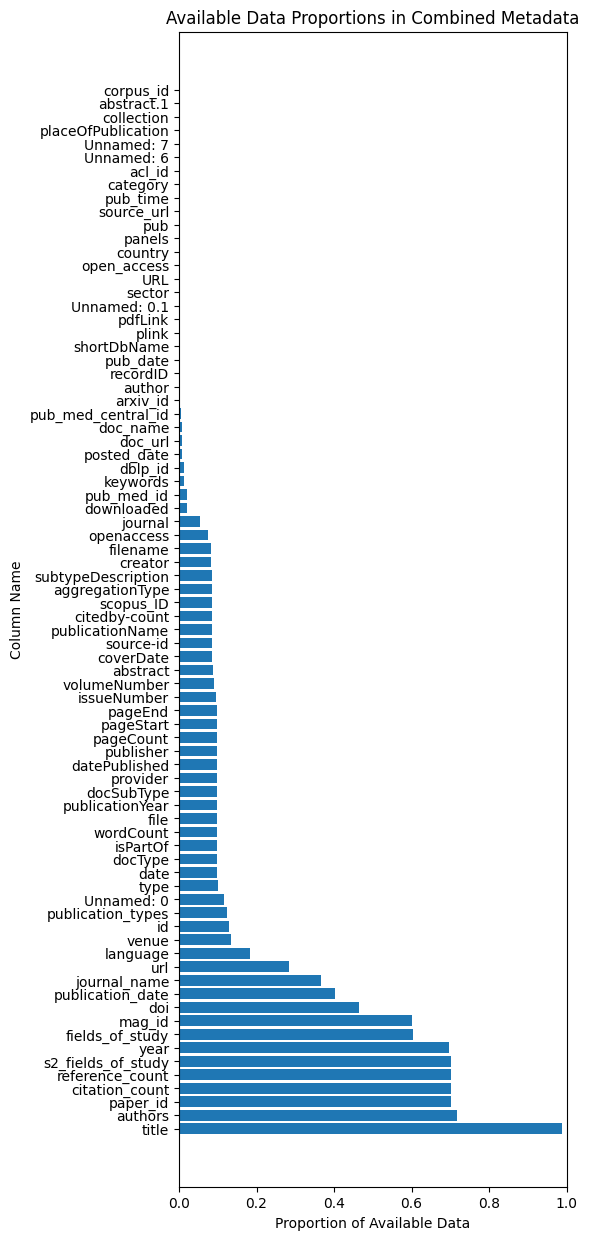

In [ ]:
plt.figure(figsize=(5, 15))
plt.barh(available_data_proportions.index, available_data_proportions.values)
plt.ylabel("Column Name")
plt.yticks(rotation=0)
plt.xlabel("Proportion of Available Data")
plt.xlim(0,1)
plt.title("Available Data Proportions in Combined Metadata")
plt.show()


# merge by similar colname


In [ ]:
directory = '/content/drive/MyDrive/finalMetaFile'

final_file_list = ['metadata_jstor.csv', 'scopus_fixed_encoding.csv',
                   'elsevier_metadata.csv', 'metadata_semantic_scholar.csv',
                   'url1_ie_table_complete.csv', 'metadata_econlit.csv',
                   'SSRN_metadata.csv', 'metadata_repec.csv']

In [ ]:
df = pd.read_csv(os.path.join(directory, 'metadata_jstor.csv'))
df.rename(columns={'datePublished': 'PublishedDate',
                   'creator': 'author',
                   'docType': 'DocumentType'}, inplace=True)
df.to_csv(os.path.join(directory, 'metadata_jstor_unifiedColName.csv'), index=False)


<ipython-input-4-8a00a4aaa9b1>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(directory, 'metadata_jstor.csv'))


In [8]:
df = pd.read_csv(os.path.join(directory, 'scopus_fixed_encoding.csv'))
df.rename(columns={'coverDate': 'PublishedDate',
                   'publicationName': 'publisher',
                   'citedby-count':'citation_count',
                   'aggregationType': 'DocumentType'}, inplace=True)
df.to_csv(os.path.join(directory, 'scopus_fixed_encoding_unifiedColName.csv'), index=False)


In [ ]:
df = pd.read_csv(os.path.join(directory, 'elsevier_metadata.csv'))
df.rename(columns={'date': 'PublishedDate',
                   'authors': 'author',
                   'journal': 'publisher',
                   'type': 'DocumentType'}, inplace=True)
df.to_csv(os.path.join(directory, 'elsevier_metadata_unifiedColName.csv'), index=False)


In [ ]:
df = pd.read_csv(os.path.join(directory, 'metadata_semantic_scholar.csv'))
df.rename(columns={'publication_date': 'PublishedDate',
                   'authors': 'author',
                   'journal_name': 'publisher',
                   'publication_types': 'DocumentType'}, inplace=True)
df.to_csv(os.path.join(directory, 'metadata_semantic_scholar_unifiedColName.csv'), index=False)


<ipython-input-20-868dfd31c4d6>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(directory, 'metadata_semantic_scholar.csv'))


In [ ]:
df = pd.read_csv(os.path.join(directory, 'url1_ie_table_complete.csv'))
df.rename(columns={'pub_time': 'PublishedDate',
                   'URL': 'url'}, inplace=True)
df.to_csv(os.path.join(directory, 'url1_ie_table_complete_unifiedColName.csv'), index=False)


In [ ]:
df = pd.read_csv(os.path.join(directory, 'metadata_econlit.csv'))
df.rename(columns={'pub_date': 'PublishedDate',
                   'journal': 'publisher',
                   'pdfLink': 'url'}, inplace=True)
df.to_csv(os.path.join(directory, 'metadata_econlit_unifiedColName.csv'), index=False)


In [ ]:
df = pd.read_csv(os.path.join(directory, 'SSRN_metadata.csv'))
df.rename(columns={'doc_name': 'title',
                   'posted_date': 'PublishedDate',
                   'authors': 'author',
                   'doc_url': 'url'}, inplace=True)
df.to_csv(os.path.join(directory, 'SSRN_metadata_unifiedColName.csv'), index=False)


In [ ]:
df = pd.read_csv(os.path.join(directory, 'metadata_repec.csv'))
df.rename(columns={'date': 'PublishedDate',
                   'journal': 'publisher',
                   'type': 'DocumentType'}, inplace=True)
df.to_csv(os.path.join(directory, 'metadata_repec_unifiedColName.csv'), index=False)


<ipython-input-11-592740940bf7>:1: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(directory, 'metadata_repec.csv'))


# check each features

In [ ]:
df = pd.read_csv(os.path.join(directory, 'metadata_semantic_scholar_unifiedColName.csv'))

<ipython-input-5-14b1290b0388>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(directory, 'metadata_semantic_scholar_unifiedColName.csv'))


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

reference_count_proportions = (df['reference_count'].value_counts() / df['reference_count'].count()).sort_values(ascending=False)


In [ ]:
unique_reference_counts = df['reference_count'].unique()
unique_reference_counts_percent = {}
for count in unique_reference_counts:
  unique_reference_counts_percent[count] = df[df['reference_count'] == count].shape[0] / len(df)

sorted_unique_reference_counts_percent = sorted(unique_reference_counts_percent.items(), key=lambda x: x[1], reverse=True)

for count, percent in sorted_unique_reference_counts_percent:
  print(f"{count}: {percent*100}")


0: 54.17945833470776
1: 1.9736673315743172
2: 1.469432005072559
3: 1.281827193016713
4: 1.2201769455626292
5: 1.1829946929980713
6: 1.1306084126173461
7: 1.10597611817536
8: 1.086159064463182
9: 1.0626895053155327
10: 1.0546261888178483
11: 1.025330314771402
12: 0.9916109912356299
13: 0.9706438406562277
14: 0.949284898836342
15: 0.9271802898168275
16: 0.8958622674324037
17: 0.8768667114825293
18: 0.8551538937034977
19: 0.82397489401731
20: 0.8076839614694801
21: 0.7900154403664033
22: 0.769970894966203
23: 0.7514429608194857
24: 0.7278470174007129
25: 0.7132875493672761
26: 0.6890091308844359
27: 0.6729709668788532
28: 0.6511823185371476
29: 0.6360920365649918
30: 0.6167046893746342
31: 0.5995543437831641
32: 0.581140155480458
33: 0.5656833591220439
34: 0.5422137999743946
35: 0.5297902261229464
36: 0.5132718018870941
37: 0.4947312293132645
38: 0.4826868082751871
39: 0.46776082585549195
40: 0.45140670117210036
41: 0.4351536839056076
42: 0.4271661979705972
43: 0.4088404786576777
44: 0.39

In [ ]:
4286883/len(df)

0.5417945833470776

In [ ]:
df.columns

Index(['paper_id', 'title', 'venue', 'year', 'reference_count',
       'citation_count', 'PublishedDate', 'DocumentType', 'author',
       's2_fields_of_study', 'fields_of_study', 'publisher', 'mag_id',
       'corpus_id', 'pub_med_id', 'pub_med_central_id', 'arxiv_id', 'dblp_id',
       'acl_id', 'doi'],
      dtype='object')

In [ ]:

s2_fields_of_study = df['s2_fields_of_study']
fields_of_study = df['fields_of_study']

correlation_matrix = df[['s2_fields_of_study', 'fields_of_study']].corr()

#print(correlation_matrix['s2_fields_of_study']['fields_of_study'])


<ipython-input-24-b0fb5f6561ba>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['s2_fields_of_study', 'fields_of_study']].corr()


In [ ]:

fields_of_study = df['fields_of_study']
s2_fields_of_study = df['s2_fields_of_study']

# Calculate the correlation coefficient between the two variables
correlation_coefficient = df['fields_of_study'].corr(df['s2_fields_of_study'])

# Print the correlation coefficient
print("Correlation coefficient between fields_of_study and s2_fields_of_study:", correlation_coefficient)


In [ ]:
df[['s2_fields_of_study', 'fields_of_study']].corr()

<ipython-input-26-91826aec152f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[['s2_fields_of_study', 'fields_of_study']].corr()


""


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-9-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:

df[df['reference_count'] == 0][['title', 'reference_count', 'citation_count']].head()


,title,reference_count,citation_count
0,Agro-Industries for Economic Growth,0,0
1,Sequential Auctions with Supply or Demand Uncertainty,0,12
2,Comparative performance of IRDP schemes in generating the income in rural areas.,0,0
3,Illiquidity in Intermediary Portfolios: Evidence from Large Hedge Funds,0,9
11,"A Concise History of Japan: Japan’s Encounter with Europe, 1543–1640",0,0


# Stats with merged feature name

In [ ]:
directory = '/content/drive/MyDrive/finalMetaFile'

final_file_list = ['metadata_jstor_unifiedColName.csv', 'scopus_fixed_encoding_unifiedColName.csv',
                   'elsevier_metadata_unifiedColName.csv', 'metadata_semantic_scholar_unifiedColName.csv',
                   'url1_ie_table_complete_unifiedColName.csv', 'metadata_econlit_unifiedColName.csv',
                   'SSRN_metadata_unifiedColName.csv', 'metadata_repec_unifiedColName.csv']

In [ ]:

def calculate_completeness(file_list, directory):
  completeness = {}
  for filename in file_list:
    filepath = os.path.join(directory, filename)
    df = pd.read_csv(filepath)

    completeness[filename] = {}
    for column in df.columns:
      completeness[filename][column] = df[column].count() / len(df)
  return completeness

completeness = calculate_completeness(final_file_list, directory)

for filename, columns in completeness.items():
  print(f"Completeness of data in {filename}:")
  for column, completeness_score in columns.items():
    print(f"{column}: {completeness_score}")
  print("----------------------------------------------------------------------------")


<ipython-input-21-f915a8d49b39>:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
<ipython-input-21-f915a8d49b39>:5: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
<ipython-input-21-f915a8d49b39>:5: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Completeness of data in metadata_jstor_unifiedColName.csv:
id: 1.0
title: 1.0
isPartOf: 1.0
publicationYear: 1.0
doi: 0.0
DocumentType: 1.0
docSubType: 1.0
provider: 1.0
collection: 0.0
PublishedDate: 1.0
issueNumber: 0.9725487904852848
volumeNumber: 0.9259118603466503
url: 1.0
author: 0.8511445155094313
publisher: 1.0
language: 0.9999616577718784
pageStart: 0.9983795844067636
pageEnd: 0.9983622391130895
placeOfPublication: 0.0
wordCount: 1.0
pageCount: 0.999992696718453
file: 1.0
----------------------------------------------------------------------------
Completeness of data in scopus_fixed_encoding_unifiedColName.csv:
Unnamed: 0: 1.0
scopus_ID: 1.0
abstract: 0.8517946104483666
PublishedDate: 1.0
DocumentType: 0.9999708785322781
url: 1.0
source-id: 1.0
citedby-count: 1.0
title: 0.9999687984274408
openaccess: 0.8805458195093032
subtypeDescription: 0.999967758375022
publisher: 1.0
doi: 0.8913706850825281
abstract.1: 0.0
language: 0.9985137650937608
-------------------------------------

<ipython-input-22-7ffe240d4a03>:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


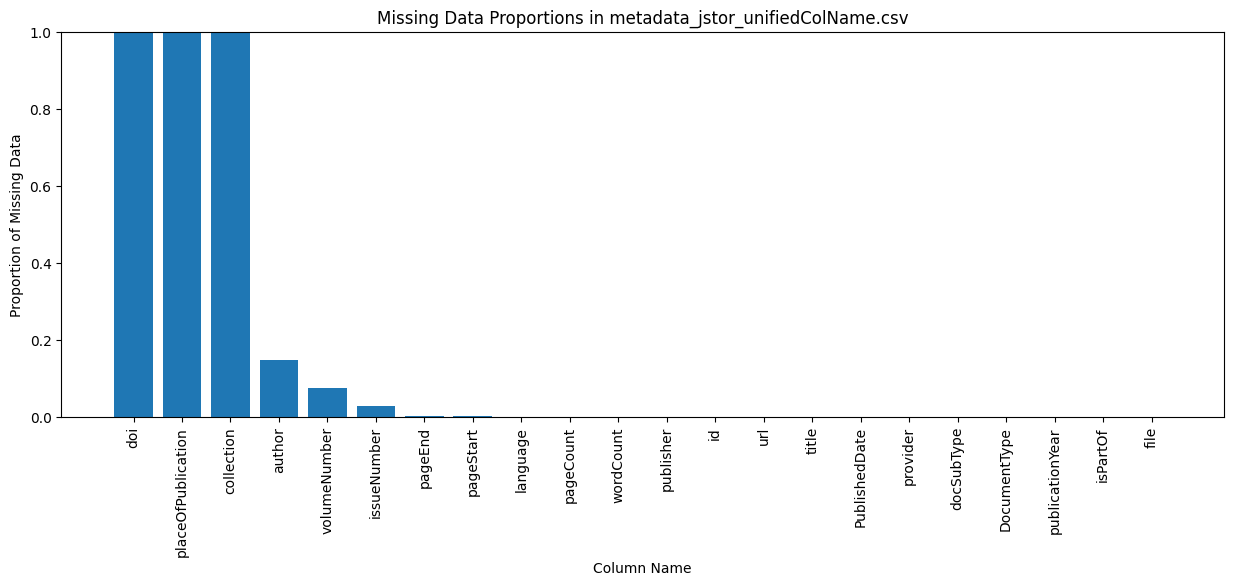

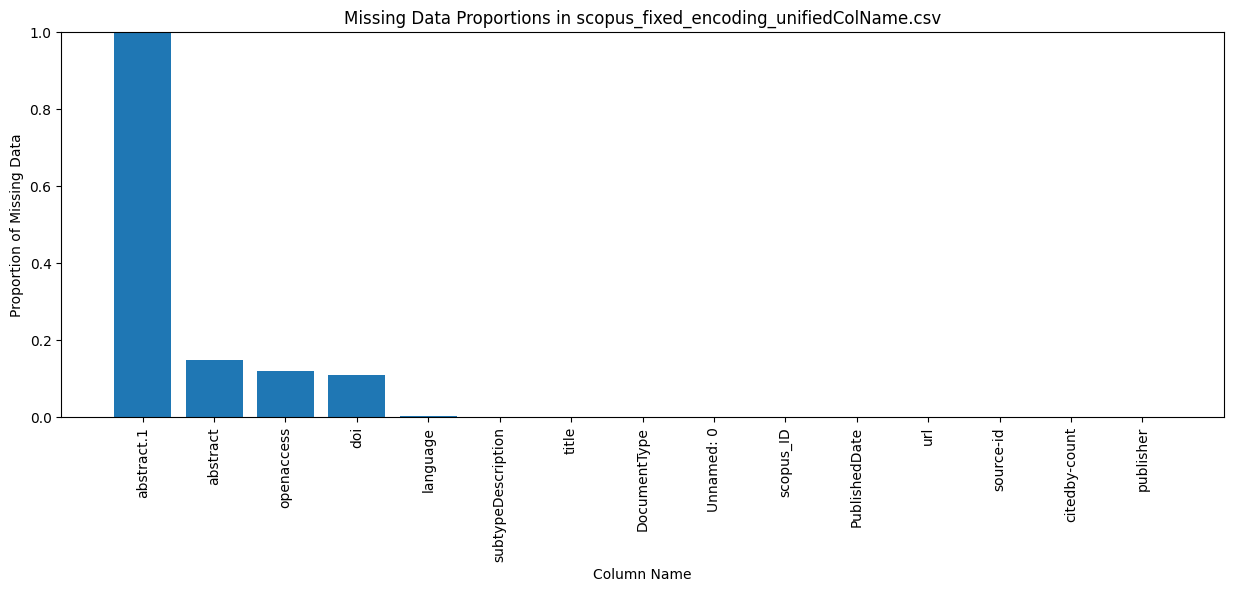

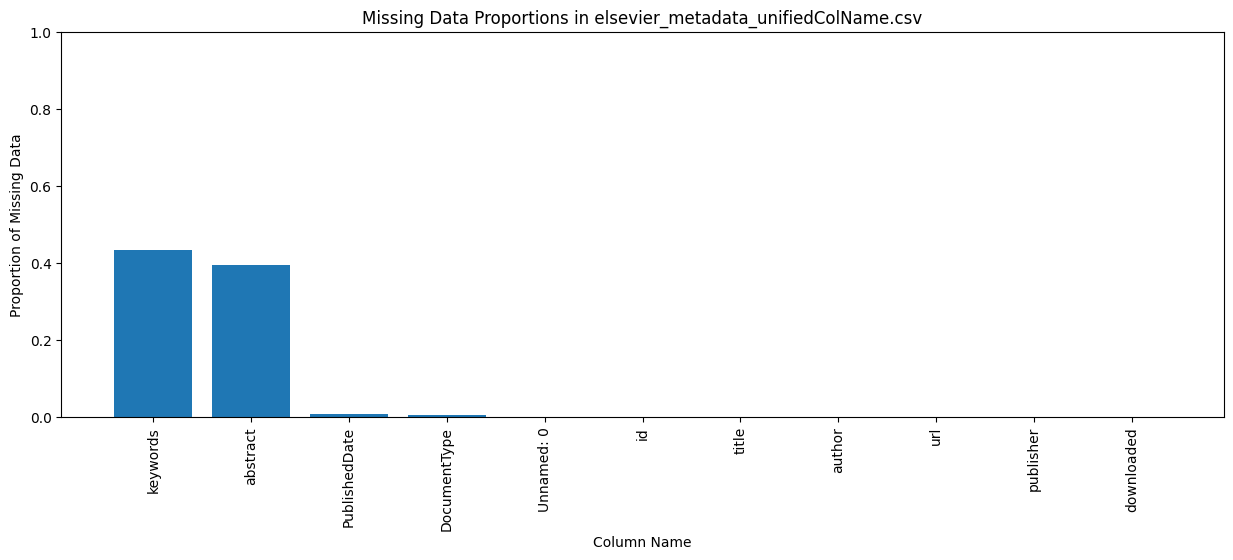

<ipython-input-22-7ffe240d4a03>:6: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


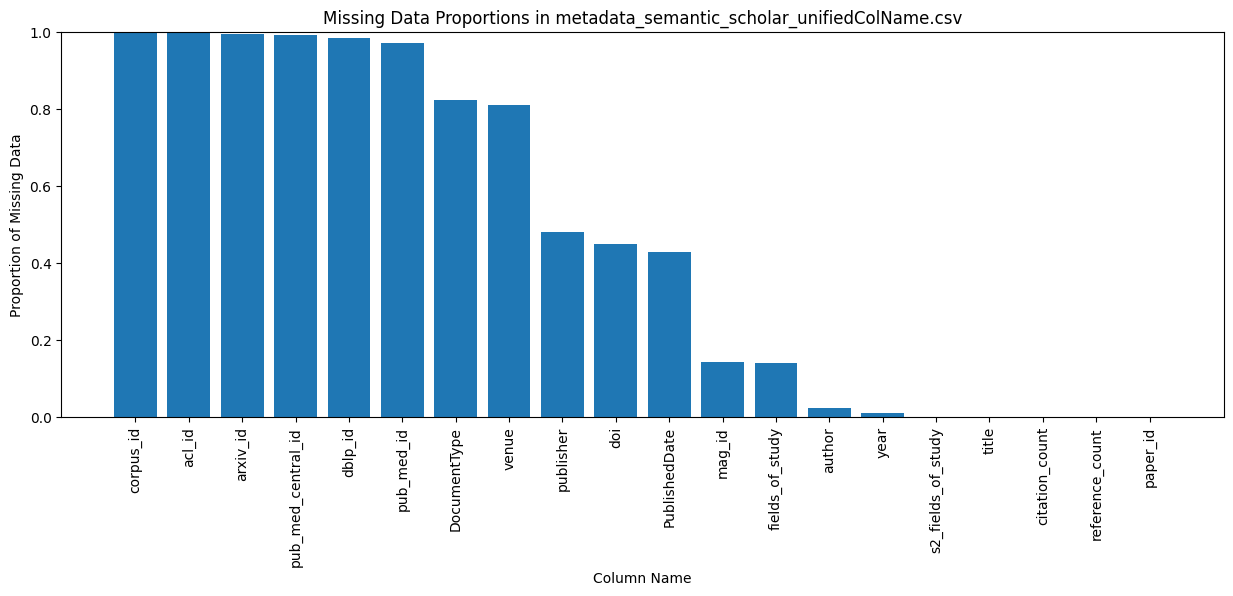

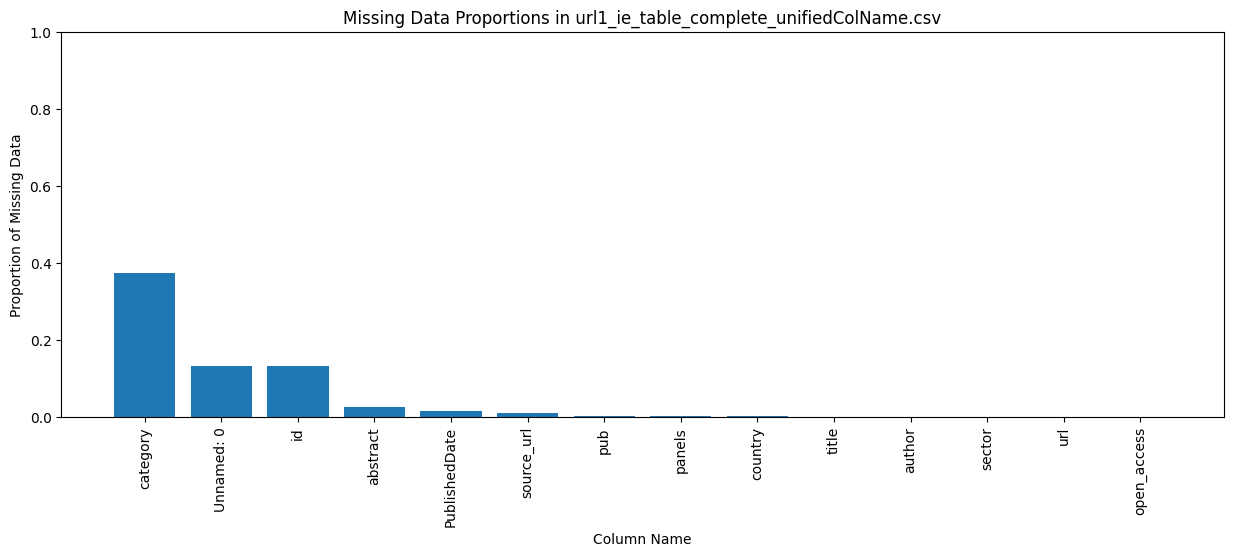

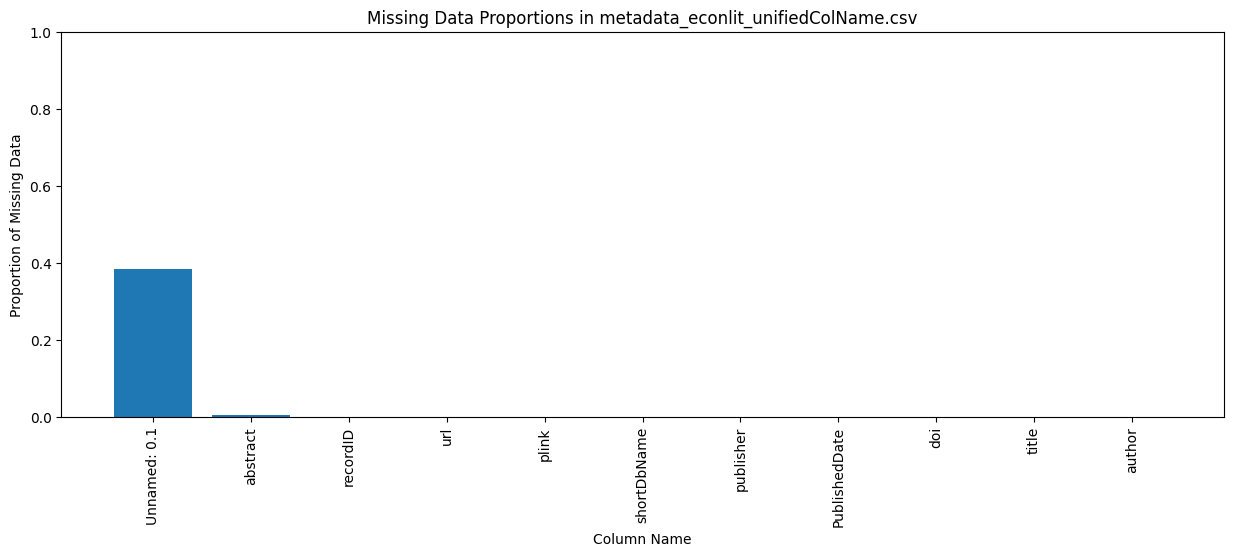

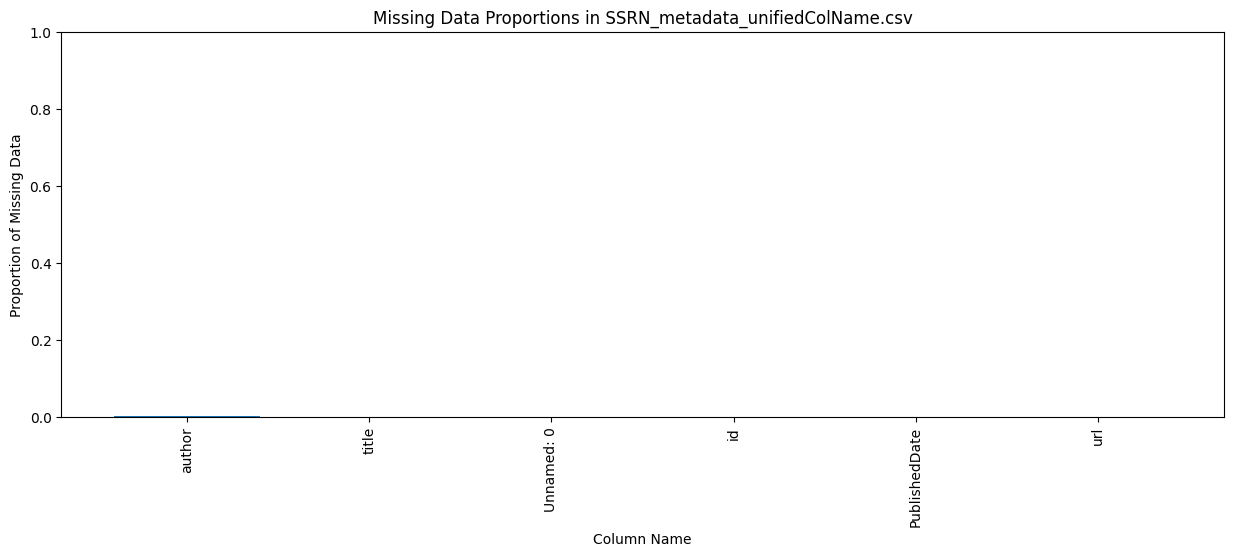

<ipython-input-22-7ffe240d4a03>:6: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


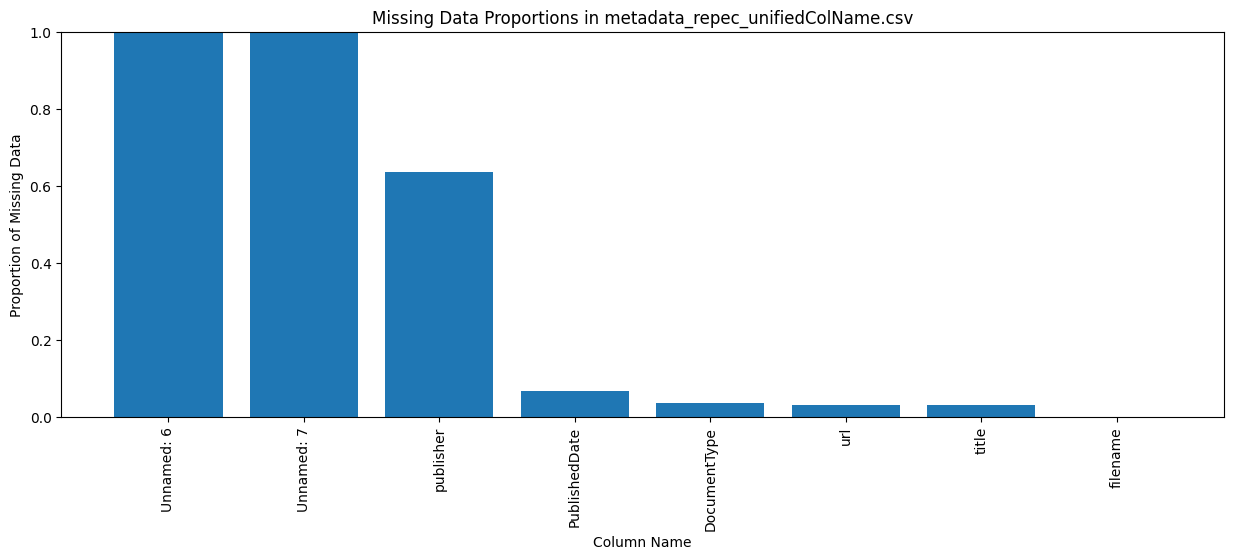

In [ ]:
import matplotlib.pyplot as plt

def plot_missing_data_proportions(file_list, directory):
  for filename in file_list:
    filepath = os.path.join(directory, filename)
    df = pd.read_csv(filepath)
    missing_data_proportions = df.isna().mean().sort_values(ascending=False)

    plt.figure(figsize=(15, 5))
    plt.bar(missing_data_proportions.index, missing_data_proportions.values)
    plt.xlabel("Column Name")
    plt.xticks(rotation=90)
    plt.ylabel("Proportion of Missing Data")
    plt.ylim(0,1)
    plt.title(f"Missing Data Proportions in {filename}")
    plt.show()

plot_missing_data_proportions(final_file_list, directory)


In [9]:
directory = '/content/drive/MyDrive/finalMetaFile'

final_file_list = ['metadata_jstor_unifiedColName.csv', 'scopus_fixed_encoding_unifiedColName.csv',
                   'elsevier_metadata_unifiedColName.csv', 'metadata_semantic_scholar_unifiedColName.csv',
                   'url1_ie_table_complete_unifiedColName.csv', 'metadata_econlit_unifiedColName.csv',
                   'SSRN_metadata_unifiedColName.csv', 'metadata_repec_unifiedColName.csv']

final_df = pd.DataFrame()

for filename in final_file_list:
  filepath = os.path.join(directory, filename)
  df = pd.read_csv(filepath)
  final_df = final_df.append(df, ignore_index=True)

final_df.to_csv(os.path.join(directory, 'combined_metadata.csv'), index=False)


<ipython-input-9-1d2923cbfb63>:12: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
<ipython-input-9-1d2923cbfb63>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(df, ignore_index=True)
<ipython-input-9-1d2923cbfb63>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(df, ignore_index=True)
<ipython-input-9-1d2923cbfb63>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(df, ignore_index=True)
<ipython-input-9-1d2923cbfb63>:12: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
<ipython-i

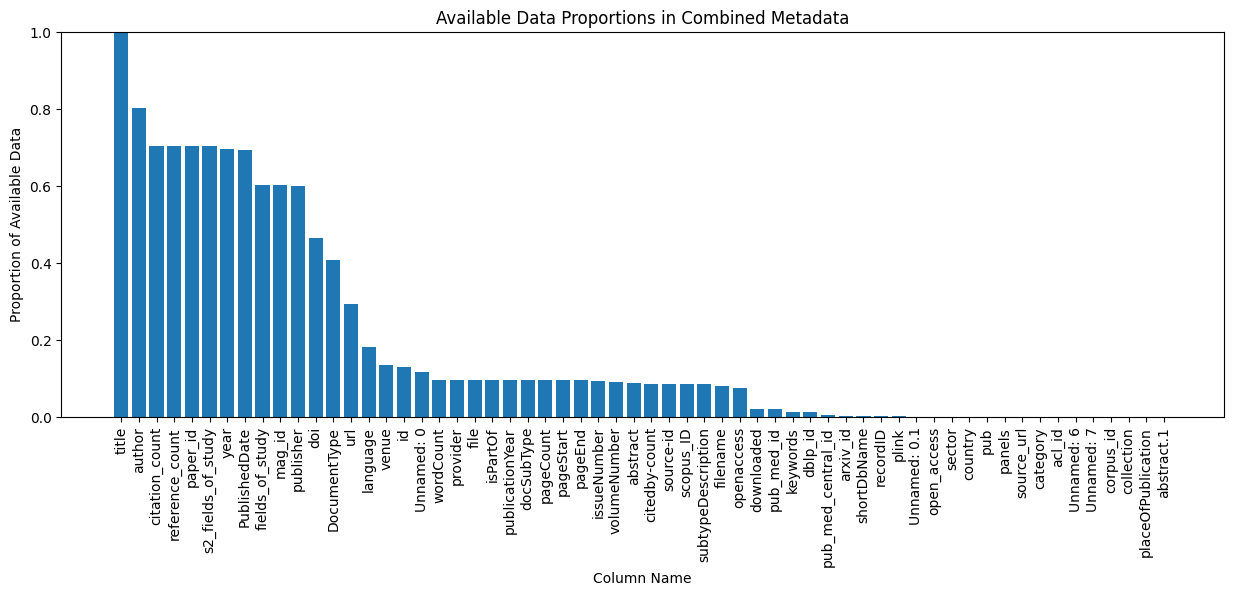

In [ ]:
import matplotlib.pyplot as plt

available_data_proportions = (1 - final_df.isna().mean()).sort_values(ascending=False)

plt.figure(figsize=(15, 5))
plt.bar(available_data_proportions.index, available_data_proportions.values)
plt.xlabel("Column Name")
plt.xticks(rotation=90)
plt.ylabel("Proportion of Available Data")
plt.ylim(0,1)
plt.title("Available Data Proportions in Combined Metadata")
plt.show()

In [ ]:
# prompt: show dashed line on y axis for every 0.2

import matplotlib.pyplot as plt



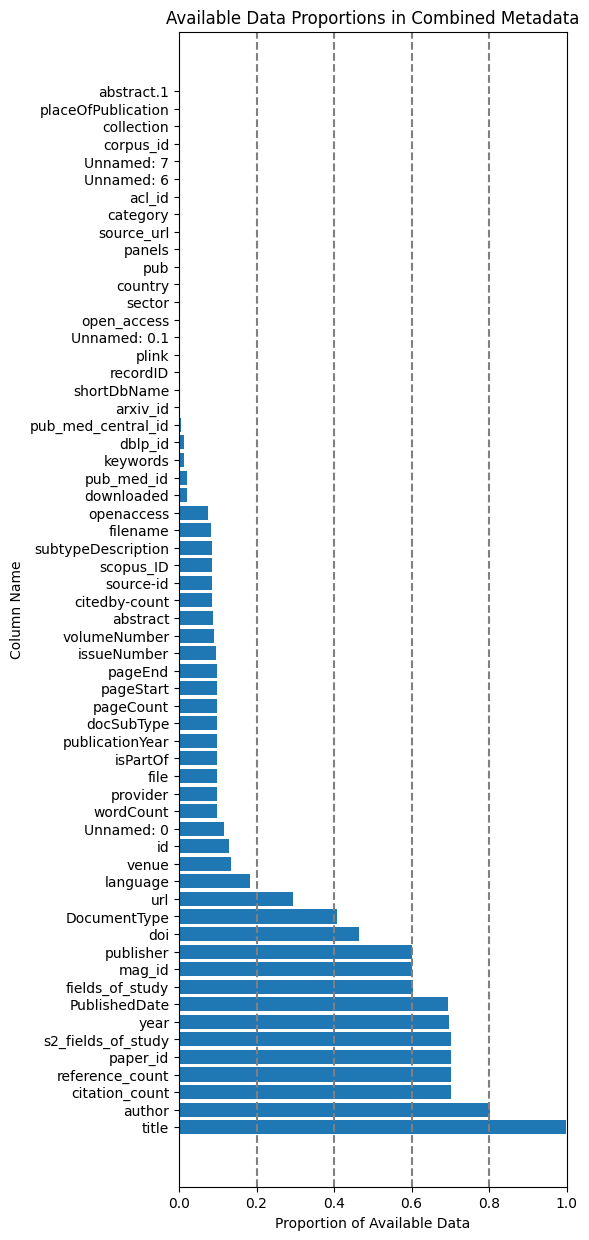

In [ ]:
plt.figure(figsize=(5, 15))
plt.barh(available_data_proportions.index, available_data_proportions.values)
plt.ylabel("Column Name")
plt.yticks(rotation=0)
plt.xlabel("Proportion of Available Data")
plt.xlim(0,1)
plt.title("Available Data Proportions in Combined Metadata")
plt.axvline(x=0.2, linestyle="--", color="grey")
plt.axvline(x=0.4, linestyle="--", color="grey")
plt.axvline(x=0.6, linestyle="--", color="grey")
plt.axvline(x=0.8, linestyle="--", color="grey")
plt.show()

In [3]:
directory = '/content/drive/MyDrive/finalMetaFile'
df = pd.read_csv(os.path.join(directory, 'combined_metadata.csv'))

<ipython-input-3-211bae0ec1f0>:2: DtypeWarning: Columns (0,2,4,5,6,7,9,10,11,12,13,14,15,16,17,21,23,24,28,30,31,32,33,37,38,43,44,45,46,47,48,49,50,51,52,54,55,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(directory, 'combined_metadata.csv'))


In [3]:
len(df)

11257050

In [4]:

unique_providers = df['provider'].unique()
print(unique_providers)


['jstor' nan]


In [4]:

column_names = df.columns.tolist()
print(column_names)


['id', 'title', 'isPartOf', 'publicationYear', 'doi', 'DocumentType', 'docSubType', 'provider', 'collection', 'PublishedDate', 'issueNumber', 'volumeNumber', 'url', 'author', 'publisher', 'language', 'pageStart', 'pageEnd', 'placeOfPublication', 'wordCount', 'pageCount', 'file', 'Unnamed: 0', 'scopus_ID', 'abstract', 'source-id', 'citedby-count', 'openaccess', 'subtypeDescription', 'abstract.1', 'keywords', 'downloaded', 'paper_id', 'venue', 'year', 'reference_count', 'citation_count', 's2_fields_of_study', 'fields_of_study', 'mag_id', 'corpus_id', 'pub_med_id', 'pub_med_central_id', 'arxiv_id', 'dblp_id', 'acl_id', 'sector', 'country', 'pub', 'open_access', 'category', 'panels', 'source_url', 'recordID', 'plink', 'shortDbName', 'Unnamed: 0.1', 'filename', 'Unnamed: 6', 'Unnamed: 7']


In [9]:
# JSTOR
# docType is selected to merge as DocumentType

df['docSubType'].unique()
#df['DocumentSubType'].unique()




array(['research-article', nan], dtype=object)

In [5]:

missing_citation_count = df['citation_count'].isna().sum()
missing_citedby_count = df['citedby-count'].isna().sum()

print(f"Number of missing values in citation_count: {missing_citation_count}")
print(f"Number of missing values in citedby-count: {missing_citedby_count}")


Number of missing values in citation_count: 3344673
Number of missing values in citedby-count: 10295560


In [10]:
# drop reference_count due to its reliability. Further discussion on this matter is at this location: https://iecausalnlpproject-wb.slack.com/archives/C04K8AG8971/p1711489315323269?thread_ts=1711404612.525819&cid=C04K8AG8971
# drop year because it is retriable from PublishedDate
# drop all features about ID
# drop all unnamed columne because it is mostly an index per each source
# drop file and provider because it is only coming from JSTOR and the value is JSTOR. Value for file is 'part-1.jsonl.gz'
#volume number and issue number are dropped becasuse it is only coming from JSTOR and not requested so far to keep it for additional analysis
# drop docSubType because it only have one value as in 'research-article'
# 'isPartOf' from JSTOR tells about the journal name but JSTOR also have `publisher` info, So far keep both for group agreement to drop/keep/merge to `publisher` info with other sources.

final_df = final_df.loc[:, ~final_df.columns.str.contains('_id|unnamed|reference_count|year|file|pubicationYear|pageEnd|pageStart|pageCount|volumeNumber|issueNumber|filename|SCOPUS_ID|-id|docSubType|ID|fields_of_study|Unnamed|id')]

len(final_df)/11257050

1.0

In [11]:
final_df['citation_count'].isna().sum()

2383183

In [12]:


available_data_proportions = (1 - final_df.isna().mean()).sort_values(ascending=False)
available_data_proportions = available_data_proportions[available_data_proportions > 0.1]


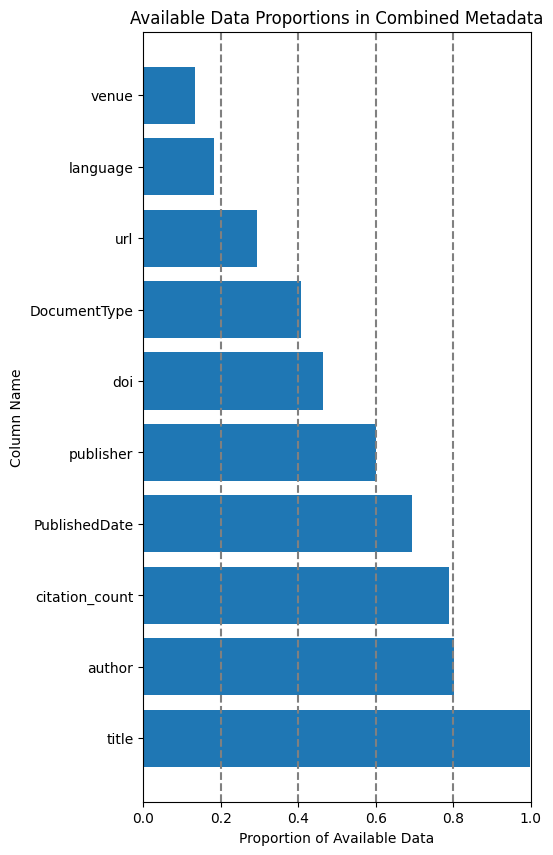

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 10))
plt.barh(available_data_proportions.index, available_data_proportions.values)
plt.ylabel("Column Name")
plt.yticks(rotation=0)
plt.xlabel("Proportion of Available Data")
plt.xlim(0,1)
plt.title("Available Data Proportions in Combined Metadata")
plt.axvline(x=0.2, linestyle="--", color="grey")
plt.axvline(x=0.4, linestyle="--", color="grey")
plt.axvline(x=0.6, linestyle="--", color="grey")
plt.axvline(x=0.8, linestyle="--", color="grey")
plt.show()

In [28]:
final_df['PublishedYear'].nunique()

227

In [31]:

def plot_unique_values(df, column_name, n):
  unique_values = df[column_name].unique()
  value_counts = df[column_name].value_counts()
  sorted_value_counts = value_counts.sort_values(ascending=False)

  plt.figure(figsize=(5, 15))
  plt.barh(sorted_value_counts.index[:n], sorted_value_counts.values[:n])
  plt.xlabel('Number of Publications')
  plt.ylabel(column_name)
  plt.title('Proportion of Unique Values in ' + column_name)

  plt.legend(unique_values[:n], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

  plt.show()


In [33]:
def plot_unique_values_non_missing(df, column_name, n):
  non_missing_df = df[df[column_name].notna()]
  unique_values = non_missing_df[column_name].unique()
  value_counts = non_missing_df[column_name].value_counts()
  sorted_value_counts = value_counts.sort_values(ascending=False)

  plt.figure(figsize=(5, 15))
  plt.barh(sorted_value_counts.index[:n], sorted_value_counts.values[:n])
  plt.xlabel('Proportion of Non-Missing Publications')
  plt.ylabel(column_name)
  plt.title('Proportion of Unique Values in ' + column_name + ' (Non-Missing Values)')

  plt.legend(unique_values[:n], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

  plt.show()


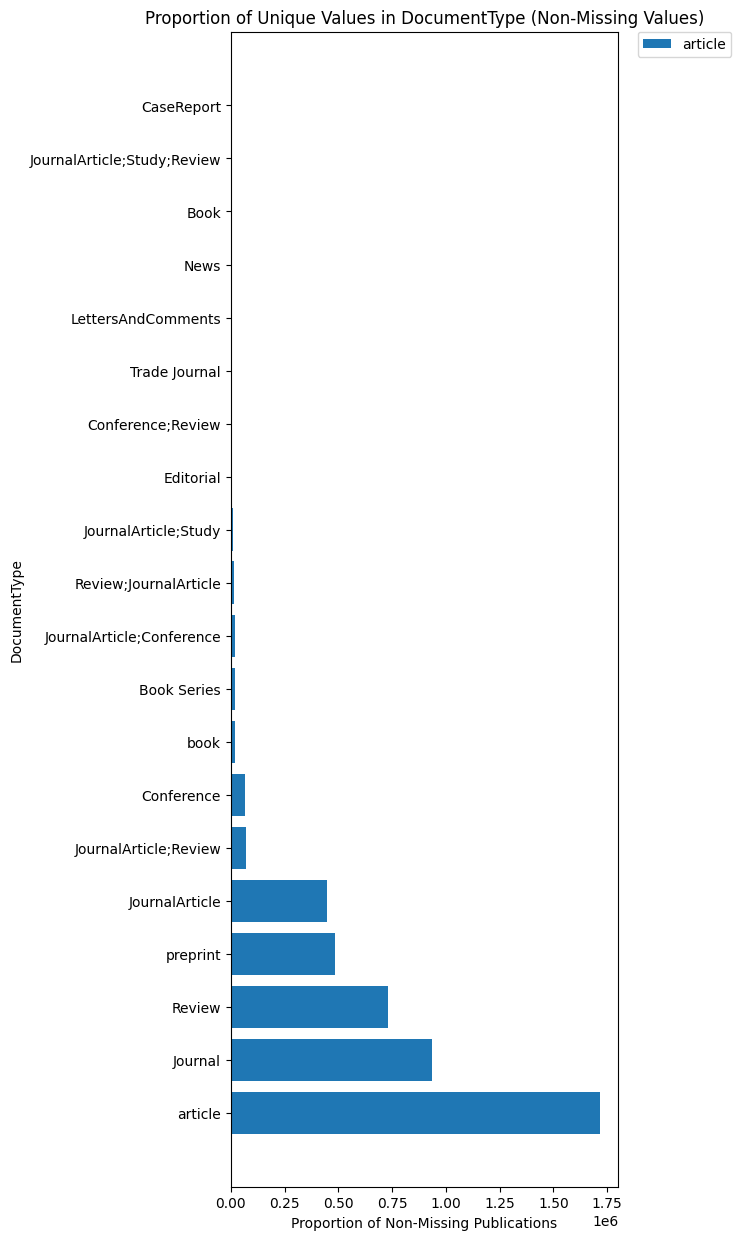

In [34]:


plot_unique_values_non_missing(final_df, 'DocumentType',20)


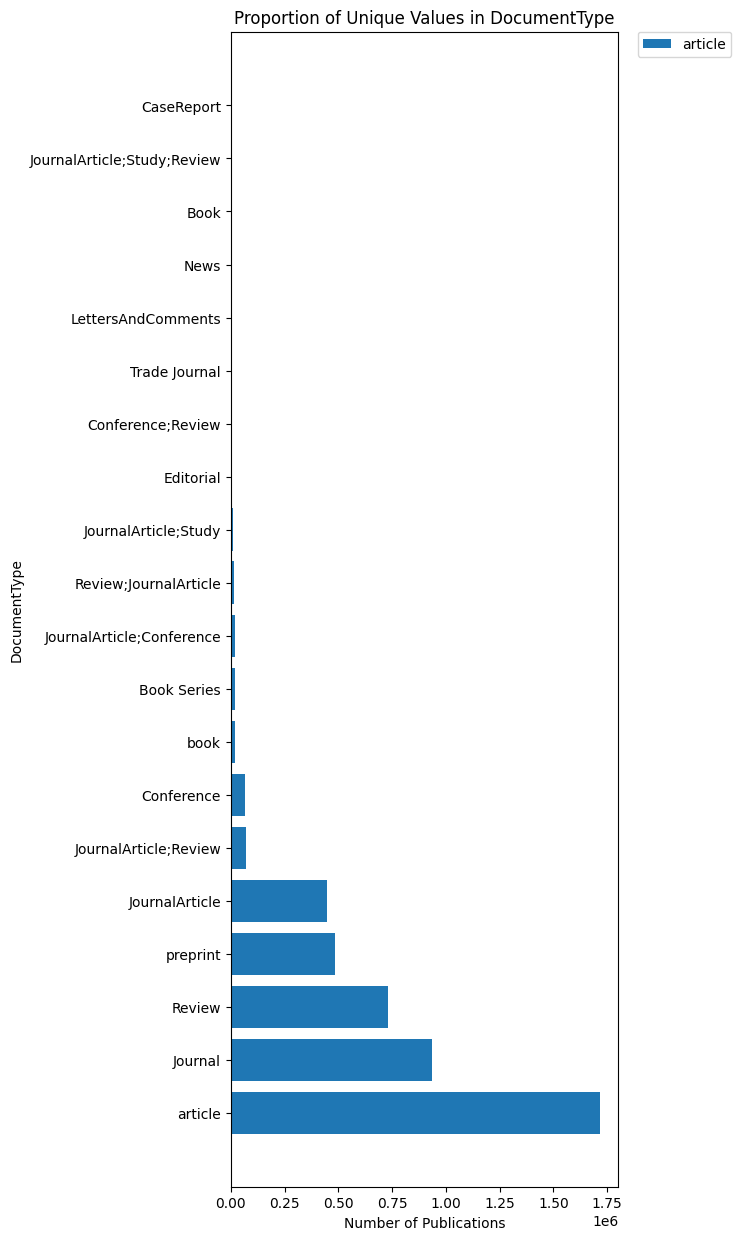

In [32]:



plot_unique_values(final_df, 'DocumentType',20)


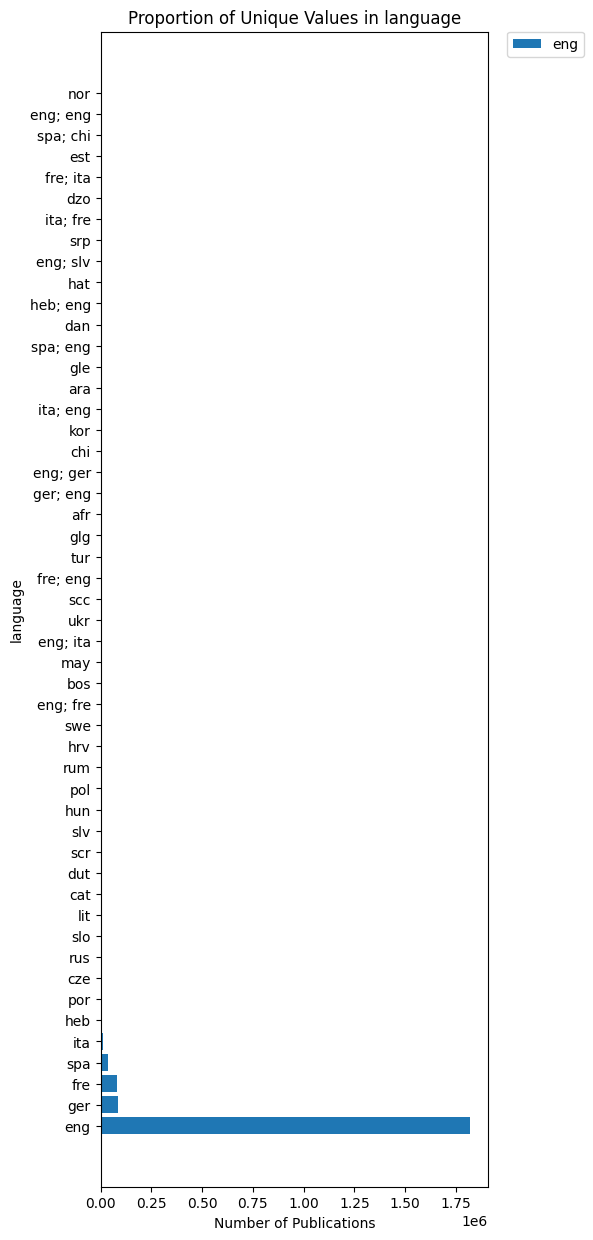

In [36]:
plot_unique_values(final_df, 'language',50)

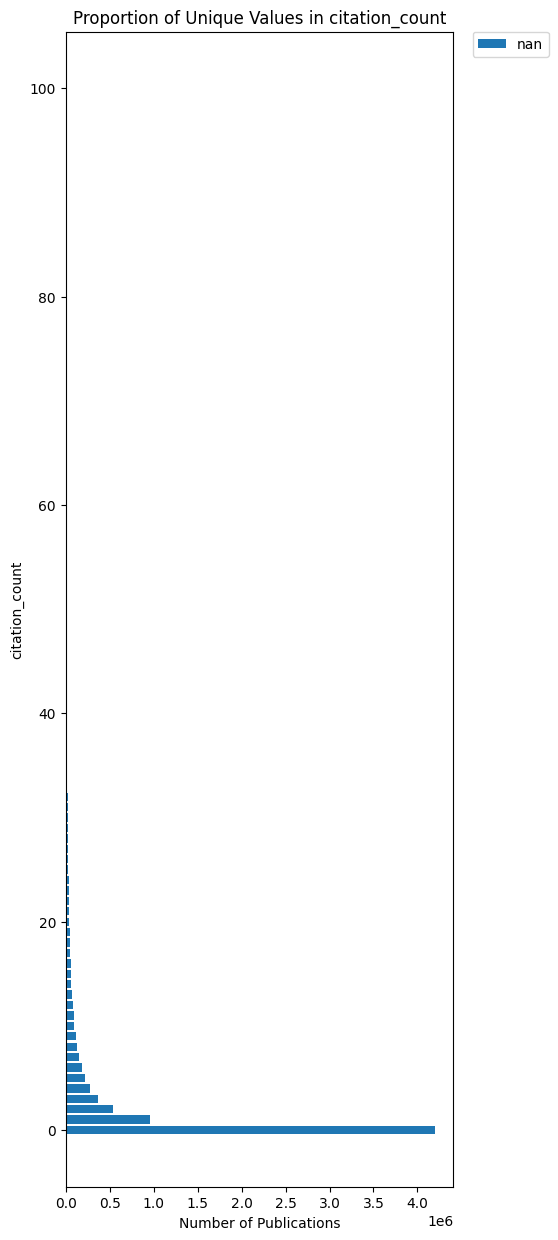

In [37]:
plot_unique_values(final_df, 'citation_count',100)

In [25]:
import datetime as dt

def convert_and_extract_year(df):
  df['PublishedDate'] = pd.to_datetime(df['PublishedDate'], errors='coerce')
  df['PublishedYear'] = df['PublishedDate'].dt.year
  return df

final_df = convert_and_extract_year(final_df)


In [41]:

print("Minimum Published Year:", final_df['PublishedYear'].min())
print("Maximum Published Year:", final_df['PublishedYear'].max())


Minimum Published Year: 1792.0
Maximum Published Year: 2203.0


In [42]:

rows_after_2024 = final_df[final_df['PublishedYear'] > 2024].shape[0]
print(f"Number of rows with PublishedYear greater than 2024: {rows_after_2024}")


Number of rows with PublishedYear greater than 2024: 1


In [47]:
rows_before_1800 = final_df[final_df['PublishedYear'] < 1800].shape[0]
print(f"Number of rows with PublishedYear before than 1800: {rows_before_1800}")

Number of rows with PublishedYear before than 1800: 2


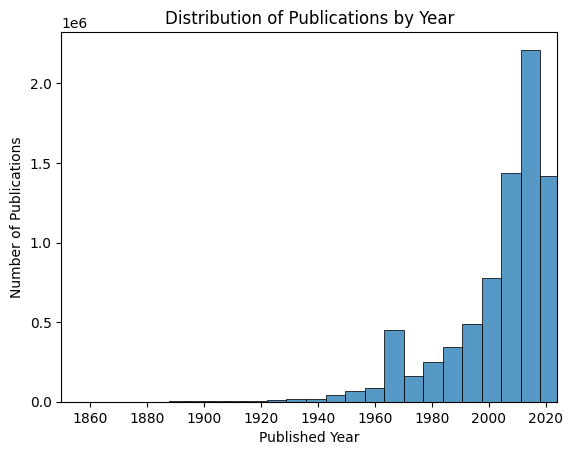

In [46]:
import seaborn as sns
# there is a paper from 1792
sns.histplot(final_df['PublishedYear'], bins=60)
plt.xlabel('Published Year')
plt.ylabel('Number of Publications')
plt.xlim(1850, 2024)
plt.title('Distribution of Publications by Year')
plt.show()


In [48]:

non_missing_df = final_df[final_df['PublishedYear'].notna()]
unique_values = non_missing_df['PublishedYear'].unique()
value_counts = non_missing_df['PublishedYear'].value_counts()
sorted_value_counts = value_counts.sort_values(ascending=False)

total_non_missing = len(non_missing_df)

for value, count in sorted_value_counts.items():
  proportion = count / total_non_missing
  print(f"{value}: {proportion}")


2020.0: 0.04794275533206217
2019.0: 0.044614100224037195
1970.0: 0.044539788447183676
2018.0: 0.04424151634974402
2017.0: 0.04374798365243408
2016.0: 0.04200614122773818
2021.0: 0.04151401789171339
2015.0: 0.041043803717485075
2014.0: 0.039910549120468874
2013.0: 0.0371001545941206
2012.0: 0.03537970883620839
2011.0: 0.03382018651231
2022.0: 0.031383657097786864
2010.0: 0.0308759026638722
2009.0: 0.028795301035726795
2008.0: 0.026104574094863338
2007.0: 0.023347479049844497
2006.0: 0.021656245507660904
2005.0: 0.01965085252264139
2004.0: 0.018043027543788216
2003.0: 0.016454164880408007
2023.0: 0.016079146654804116
2002.0: 0.015313094734446865
2001.0: 0.014045566444081541
2000.0: 0.01322378069108415
1999.0: 0.011672842658649879
1998.0: 0.011101154471890546
1997.0: 0.01042607041630226
1996.0: 0.010055152150800632
1995.0: 0.009300503244477802
1994.0: 0.008895888431885697
1993.0: 0.008278331941482295
1992.0: 0.007938803995513619
1991.0: 0.00743835261553111
1990.0: 0.007170573971352041
198